###                                                TWITTER SENTIMENT ANALYSIS

Importing Libraries

In [2]:
import pandas as pd  # Data handling
import numpy as np  # Numerical operations
import seaborn as sns  # Data visualization
import matplotlib.pyplot as plt  # Plotting
from wordcloud import WordCloud  # Word cloud generation
from PIL import Image
import re  # Regular expressions
import string  # String manipulation
import nltk  # Natural language processing (NLP)
import joblib  # Saving models

# Download the WordNet resource
nltk.download('wordnet')  # WordNet resource for lemmatization
from nltk.corpus import stopwords  # Stopwords
from nltk.tokenize import word_tokenize  # Tokenization
from nltk.stem import WordNetLemmatizer  # Lemmatization

nltk.download('punkt')  # Punkt tokenizer data
nltk.download('stopwords')  # Stopwords data
nltk.download('wordnet')  # WordNet data

from sklearn.feature_extraction.text import TfidfVectorizer  # TF-IDF vectorizer
from sklearn.ensemble import RandomForestClassifier  # Random forest classifier
from sklearn.metrics import accuracy_score  # Accuracy evaluation
from sklearn.model_selection import train_test_split  # Train-test split
from sklearn.model_selection import train_test_split  # (duplicate) Train-test split
from sklearn.metrics import confusion_matrix, classification_report  # Performance metrics


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
#load the dataset
df_train = pd.read_csv('C:/Users/Admin/Desktop/Capstone New 2025/twitter_training.csv')
df_test = pd.read_csv('C:/Users/Admin/Desktop/Capstone New 2025/twitter_validation.csv')

In [4]:
df_train.shape

(74681, 4)

In [5]:
df_test.shape

(999, 4)

In [6]:
# concatenate data
df = pd.concat([df_train, df_test], ignore_index=False)
df.head(2)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,2401.0,Borderlands,Positive,I am coming to the borders and I will kill you...,NaN,NaN,NaN,NaN
1,2401.0,Borderlands,Positive,im getting on borderlands and i will kill you ...,NaN,NaN,NaN,NaN


In [7]:
df.shape

(75680, 8)

Removing and replacing the columns

In [8]:
# Removing the unnecessary columns
columns_to_drop = ['2401', '3364', 'Facebook', 'Irrelevant', 'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣']
df = df.drop(columns_to_drop, axis=1)

# Renaming columns
df = df.rename(columns={'im getting on borderlands and i will murder you all ,': 'Tweet', 'Positive': 'Sentiment', 'Borderlands':"Entity"})
df.head()

,Entity,Sentiment,Tweet
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


Check missing values

In [9]:
print(df.isnull().sum())

Entity        999
Sentiment     999
Tweet        1685
dtype: int64


Remove missing values

In [10]:
# remove missing values
df.dropna(inplace=True)
# check missing values
df.isnull().sum()  

Entity       0
Sentiment    0
Tweet        0
dtype: int64

Check duplicate values

In [11]:
df.duplicated().sum()

np.int64(3038)

In [12]:
# remove duplicate values 
remove_duplicates = df.drop_duplicates()
df = remove_duplicates
# check duplicate values
df.duplicated().sum()

np.int64(0)

### Visualization

Bar Chart and Pie Chart

C:\Users\Admin\AppData\Local\Temp\ipykernel_264\3241906633.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Sentiment'].value_counts().index,  y=df['Sentiment'].value_counts().values, palette='dark', ax=axs)


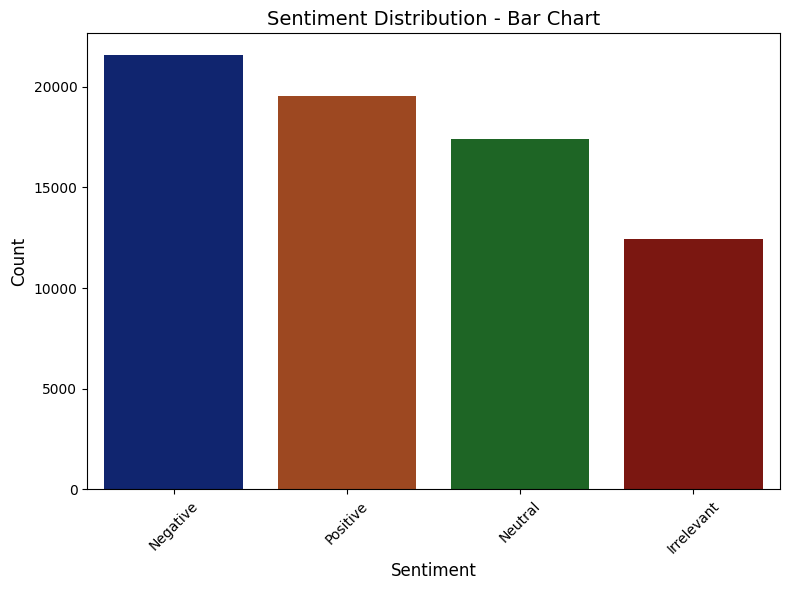

In [13]:
# Create subplot
fig, axs = plt.subplots(figsize=(8, 6))

# Plotting bar chart for sentiment distribution with seaborn color palette
sns.barplot(x=df['Sentiment'].value_counts().index,  y=df['Sentiment'].value_counts().values, palette='dark', ax=axs)

axs.set_title('Sentiment Distribution - Bar Chart', fontsize=14)
axs.set_xlabel('Sentiment', fontsize=12)
axs.set_ylabel('Count', fontsize=12)
axs.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

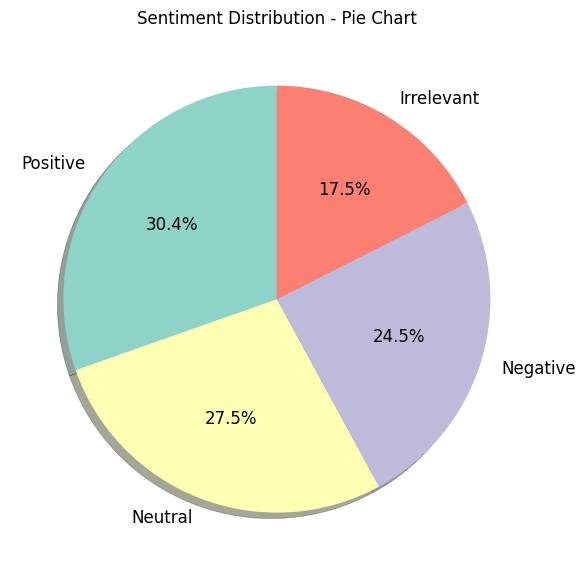

In [14]:
# Create subplot
fig, axs = plt.subplots(figsize=(6, 6))

# Plotting pie chart for sentiment distribution with seaborn color palette
colors = sns.color_palette("Set3", n_colors=len(df['Sentiment'].unique()))  # Set3 is a good color palette

axs.pie(df['Sentiment'].value_counts(), labels=df['Sentiment'].unique(), autopct='%1.1f%%',startangle=90, wedgeprops={'linewidth': 0.5}, textprops={'fontsize': 12}, colors=colors, shadow=True)
axs.set_title('Sentiment Distribution - Pie Chart')

# Display the plot
plt.tight_layout()
plt.show()

Cross Table

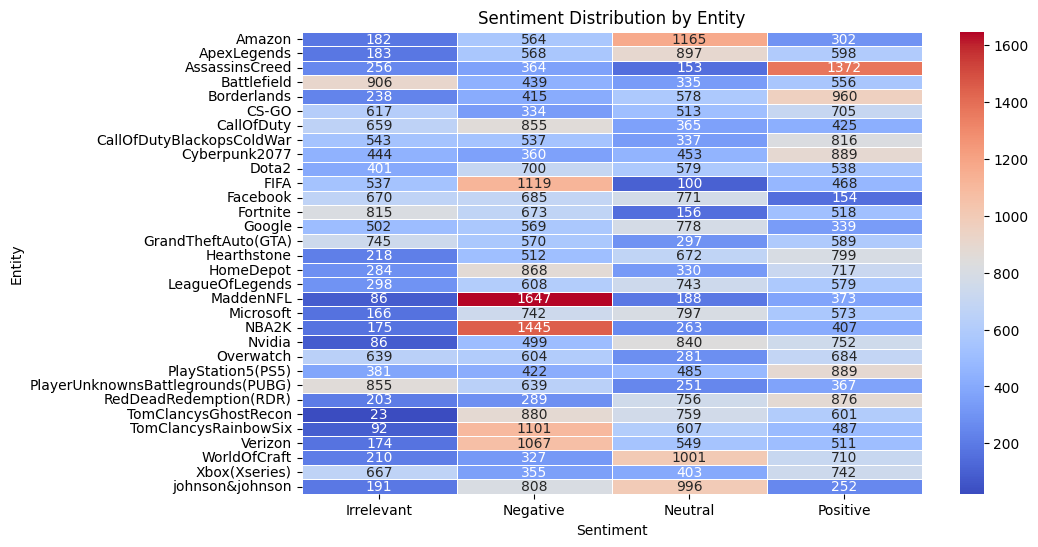

In [15]:
# Create cross-tabulation table in plot
plt.figure(figsize=(10, 6))
count_table = pd.crosstab(index=df['Entity'], columns=df['Sentiment'])
sns.heatmap(count_table, cmap='coolwarm', annot=True, fmt='d',linewidths=0.5, linecolor='white')
plt.title('Sentiment Distribution by Entity')
plt.xlabel('Sentiment')
plt.ylabel('Entity')
plt.show()

In [16]:
# Display minimum and maximum values for each sentiment for each branch
for sentiment in count_table.columns:
    min_Entity = count_table[sentiment].idxmin()
    max_Entity = count_table[sentiment].idxmax()
    min_val = count_table[sentiment].min()
    max_val = count_table[sentiment].max()
    print(f"Sentiment '{sentiment}':")
    print(f"  Minimum value '{min_val}' at Entity '{min_Entity}'")
    print(f"  Maximum value '{max_val}' at Entity '{max_Entity}'\n")

Sentiment 'Irrelevant':
  Minimum value '23' at Entity 'TomClancysGhostRecon'
  Maximum value '906' at Entity 'Battlefield'

Sentiment 'Negative':
  Minimum value '289' at Entity 'RedDeadRedemption(RDR)'
  Maximum value '1647' at Entity 'MaddenNFL'

Sentiment 'Neutral':
  Minimum value '100' at Entity 'FIFA'
  Maximum value '1165' at Entity 'Amazon'

Sentiment 'Positive':
  Minimum value '154' at Entity 'Facebook'
  Maximum value '1372' at Entity 'AssassinsCreed'



### Interpretation of each sentiment mentions

Sentiment : Positive Minimum value 154 at Branch 'Facebook' and Maximum value 1372 at Branch 'AssassinsCreed'

Sentiment : Negative Minimum value 289 at Branch 'RedDeadRedemption(RDR)'and Maximum value 1647 at Branch 'MaddenNFL'

Sentiment : Neutral Minimum value 100 at Branch 'FIFA'and Maximum value 1165 at Branch 'Amazon'

Sentiment : Irrelevant Minimum value 2112 at Branch 'PlayerUnknownsBattlegrounds(PUBG)' and Maximum value 2304 at Branch 'CallOfDuty'

Cloud Plotting of Branches

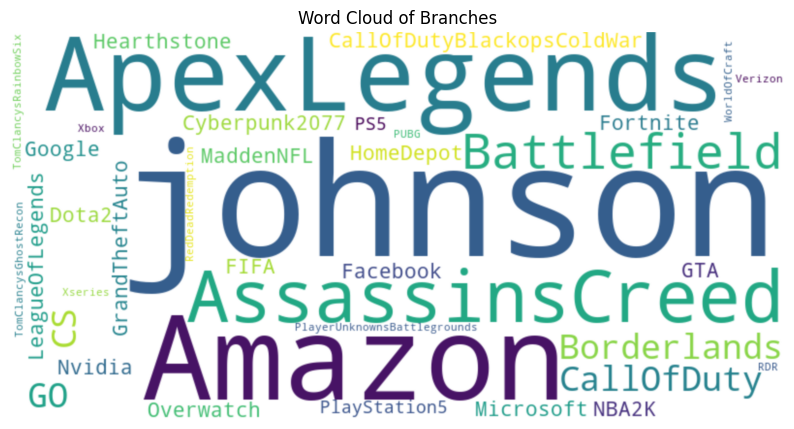

In [17]:
# Convert branches to a single string
entity_text = ' '.join(count_table.index)

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(entity_text)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bicubic')
plt.title('Word Cloud of Branches')
plt.axis('off')
plt.show()

Cloud Plot of Tweets

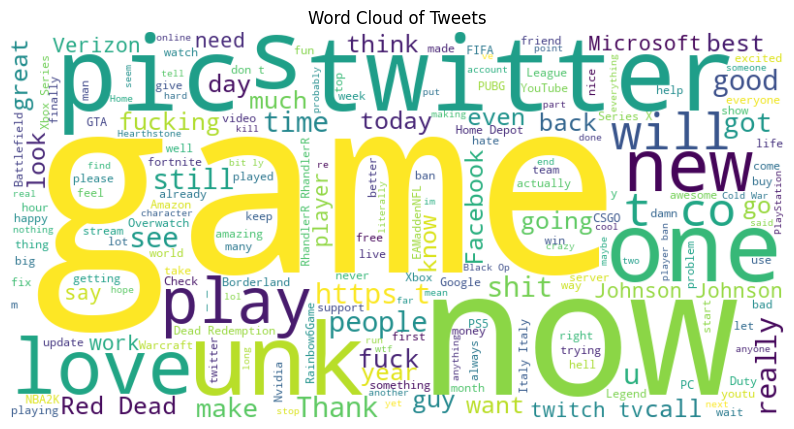

In [18]:
# Concatenate all tweets into a single string
all_tweets_text = ' '.join(df['Tweet'])

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets_text)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Tweets')
plt.axis('off')
plt.show()

### PreProcessing the Data

Removing Non Strings

In [19]:
def filter_non_string(df, column):
    df = df.dropna(subset=[column])
    df[column] = df[column].astype(str)
    return df

In [20]:
#converting to lower case
def normalize_text(text):
    return text.lower()

In [21]:
#remove HTML tags
def remove_html_tags(text):
    return re.sub(r'<.*?>', '', text)

In [22]:
#remove URL or Hyperlink
def remove_urls(text):
    return re.sub(r'http\S+|www\S+', '', text)

In [23]:
#remove numeric digits
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

In [24]:
#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [25]:
#Split Text into Tokens
def tokenize_text(text):
    return word_tokenize(text)

In [26]:
#Eliminate Stop Words
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

In [27]:
#remove emojis
def remove_emojis(text):
    if isinstance(text, str):
        emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # emoticons
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                   u"\U00002500-\U00002BEF"  # chinese char
                                   u"\U00002702-\U000027B0"
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   u"\U0001f926-\U0001f937"
                                   u"\U00010000-\U0010ffff"
                                   u"\u2640-\u2642"
                                   u"\u2600-\u2B55"
                                   u"\u200d"
                                   u"\u23cf"
                                   u"\u23e9"
                                   u"\u231a"
                                   u"\ufe0f"  # dingbats
                                   u"\u3030"
                                   "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    else:
        return text

In [28]:
def vectorize_data(text_data):
    # Join the tokenized text into strings
    text_data_strings = [" ".join(tokens) for tokens in text_data]
    # Initialize TfidfVectorizer
    tfidf_vectorizer = TfidfVectorizer()
    # Fit and transform the text data to generate TF-IDF vectors
    tfidf_vectors = tfidf_vectorizer.fit_transform(text_data_strings)
    return tfidf_vectors, tfidf_vectorizer

In [29]:
def preprocess_text(df):
    df = filter_non_string(df, 'Tweet')
    df['Tweet'] = df['Tweet'].apply(normalize_text)
    df['Tweet'] = df['Tweet'].apply(remove_html_tags)
    df['Tweet'] = df['Tweet'].apply(remove_urls)
    df['Tweet'] = df['Tweet'].apply(remove_numbers)
    df['Tweet'] = df['Tweet'].apply(remove_punctuation)
    df['Tweet'] = df['Tweet'].apply(tokenize_text)
    df['Tweet'] = df['Tweet'].apply(remove_stopwords)
    df['Tweet'] = df['Tweet'].apply(remove_emojis)
    return df

# Usage:
df_processed = preprocess_text(df)

### Build Model
Split Training Data

In [30]:
# df_processed contains preprocessed text data
# Convert list of words into a single string for each entry in 'Tweet' column
df_processed['Tweet'] = df_processed['Tweet'].apply(lambda x: ' '.join(x))

# Split data into features (X) and target (y)
X = df_processed['Tweet']  # Features
y = df_processed['Sentiment']  # Target

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (56765,)
Shape of X_test: (14192,)
Shape of y_train: (56765,)
Shape of y_test: (14192,)


RandomForestClassifier

-->Random Forest is a collection of decision trees.

-->Random Forest creates many decision trees (hence the "forest") and makes a decision by taking the majority vote from all trees.

In [31]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Convert text data to TF-IDF features(term frequency-inverse document frequency).
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

#TF-IDF vectorization converts text data into numeric form, where each word has a weight based on its frequency in the document and its rarity across all documents. 
# This helps machine learning models process textual data effectively.

In [33]:
# Train Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)
rf_classifier

RandomForestClassifier(random_state=42)

In [34]:
# Predict on the testing data
y_pred = rf_classifier.predict(X_test_tfidf)

In [35]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9063556933483653


Confusion Matrix

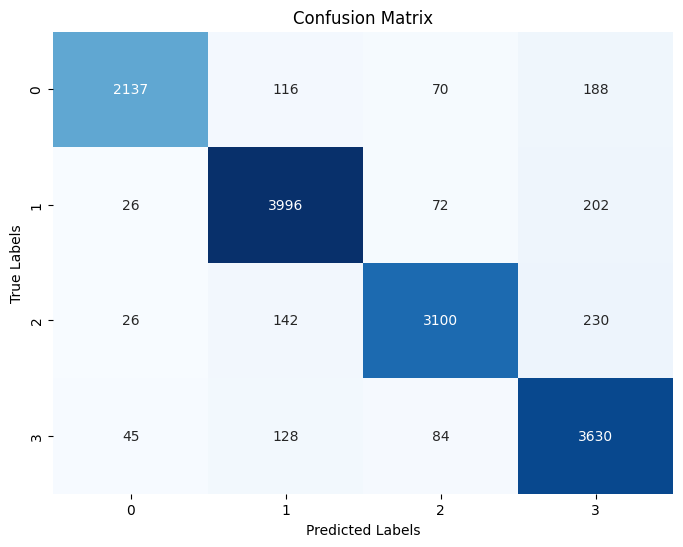

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.96      0.85      0.90      2511
    Negative       0.91      0.93      0.92      4296
     Neutral       0.93      0.89      0.91      3498
    Positive       0.85      0.93      0.89      3887

    accuracy                           0.91     14192
   macro avg       0.91      0.90      0.91     14192
weighted avg       0.91      0.91      0.91     14192



In [36]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a classification report
class_report = classification_report(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print classification report
print("Classification Report:")
print(class_report)

Actual Vs Predicted

In [37]:
# Print some actual vs predicted labels along with tweet text
print("Actual vs Predicted Labels with Tweet Text:")
for tweet, actual_label, predicted_label in zip(X_test[:10], y_test[:10], y_pred[:10]):
    print("Tweet:", tweet)
    print("Actual Label:", actual_label)
    print("Predicted Label:", predicted_label)
    print("-----------------------")

Actual vs Predicted Labels with Tweet Text:
Tweet: women please work stores like circuit home hardware get bored condescending men thinking ’ know another screw
Actual Label: Positive
Predicted Label: Negative
-----------------------
Tweet: zai absolute beast reddit fe
Actual Label: Neutral
Predicted Label: Neutral
-----------------------
Tweet: hard fought indeed …
Actual Label: Neutral
Predicted Label: Neutral
-----------------------
Tweet: rhandlerr ’ superstar solo wins criminal deserved pictwittercomhilloxffi
Actual Label: Irrelevant
Predicted Label: Irrelevant
-----------------------
Tweet: ea eamaddennfl recent announcement ea locked another long term contract nfl remarkably disrespectful fans madden years allow competition madden longer quality
Actual Label: Negative
Predicted Label: Negative
-----------------------
Tweet: first played apex got wave happiness brings back
Actual Label: Positive
Predicted Label: Positive
-----------------------
Tweet: speed better ever however de

Save Models

In [38]:
# Save the trained model
joblib.dump(rf_classifier, 'rf_model.pkl')

['rf_model.pkl']

Predict Random Tweet by Model

In [39]:
# Load the saved model
Tweet_Sentiment_Ai = joblib.load('rf_model.pkl')

# Define a mapping between sentiment labels and emojis
sentiment_emojis = {
    'Positive': '😄',
    'Negative': '😞',
    'Neutral': '😐',
    'Irrelevant': '🤷‍♂️'
}

In [40]:
# Example tweets
example_tweets = [
    "I just finished playing Borderlands and it was absolutely amazing! Can't wait for the next one!",
    "I'm really disappointed with the latest Borderlands update. It ruined the game for me.",
    "Haven't played Borderlands in a while. Need to catch up on the latest updates.",
    "Just saw a funny cat video while searching for Borderlands gameplay. Cats always cheer me up!"
]

In [41]:
# Transform example tweets into TF-IDF features
example_tweets_tfidf = vectorizer.transform(example_tweets)

In [42]:
# Predict sentiment for example tweets
predictions = Tweet_Sentiment_Ai.predict(example_tweets_tfidf)

In [43]:
# Print the predicted sentiment and corresponding emoji for each example tweet
for tweet, prediction in zip(example_tweets, predictions):
    sentiment = prediction
    emoji = sentiment_emojis[sentiment]  # Get the emoji directly from the mapping without a default value
    print("Tweet:", tweet)
    print("Sentiment:", sentiment)
    print("Emoji:", emoji)
    print()

Tweet: I just finished playing Borderlands and it was absolutely amazing! Can't wait for the next one!
Sentiment: Positive
Emoji: 😄

Tweet: I'm really disappointed with the latest Borderlands update. It ruined the game for me.
Sentiment: Negative
Emoji: 😞

Tweet: Haven't played Borderlands in a while. Need to catch up on the latest updates.
Sentiment: Neutral
Emoji: 😐

Tweet: Just saw a funny cat video while searching for Borderlands gameplay. Cats always cheer me up!
Sentiment: Neutral
Emoji: 😐



### Model Optimization and Hyperparameter Tuning

In [45]:
from sklearn.model_selection import GridSearchCV

# Set up grid search for Random Forest
param_grid = {
    'n_estimators': [50],
    'max_depth': [10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=2,n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# Best hyperparameters
print(grid_search.best_params_)

{'max_depth': 10, 'n_estimators': 50}


--> The code is performing a hyperparameter tuning process to find the best Random Forest configuration that maximizes model performance.

-->GridSearchCV tests each combination of hyperparameters (here, combinations of n_estimators and max_depth) and evaluates their performance on training data using cross-validation.

-->After trying all combinations, it selects the best combination of hyperparameters that gives the best model performance based on  evaluation metric (accuracy, precision, etc.).

##### Feature Engineering

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Use TfidfVectorizer with n-grams (e.g., bi-grams or tri-grams)
vectorizer = TfidfVectorizer(ngram_range=(1, 1))  # This will include both unigrams and bigrams
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize Random Forest model
rf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)

# Fit the model
rf.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = rf.predict(X_test_tfidf)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.95      0.84      0.89      2511
    Negative       0.91      0.93      0.92      4296
     Neutral       0.93      0.88      0.90      3498
    Positive       0.85      0.93      0.89      3887

    accuracy                           0.90     14192
   macro avg       0.91      0.90      0.90     14192
weighted avg       0.90      0.90      0.90     14192



### Ensemble Methods and Model Comparison(Gradient Boosting or Voting Classifier)

In [49]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import classification_report

# Initialize individual models
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Create a Voting Classifier (combines predictions of different classifiers)
voting_clf = VotingClassifier(estimators=[('rf', rf), ('gb', gb)], voting='hard')

# Fit the Voting Classifier
voting_clf.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = voting_clf.predict(X_test_tfidf)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.89      0.86      0.87      2511
    Negative       0.58      0.96      0.72      4296
     Neutral       0.82      0.53      0.64      3498
    Positive       0.91      0.55      0.69      3887

    accuracy                           0.72     14192
   macro avg       0.80      0.72      0.73     14192
weighted avg       0.78      0.72      0.72     14192



#### Feature Importance Analysis

           Feature  Importance
16943         love    0.006494
11189         game    0.005297
10345          fix    0.005066
11925         good    0.005054
8498   eamaddennfl    0.004771
10990         fuck    0.004431
26468         shit    0.004315
2639          best    0.003919
16527         like    0.003392
11048          fun    0.003370


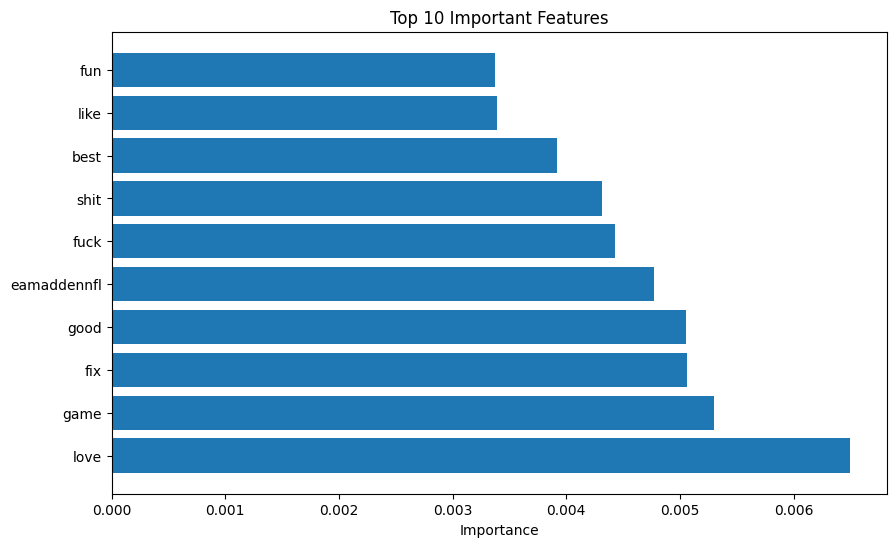

In [50]:
# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_tfidf, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to display feature names and importance scores
features = vectorizer.get_feature_names_out()
feature_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Display top 10 important features
print(feature_df.head(10))

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'].head(10), feature_df['Importance'].head(10))
plt.xlabel('Importance')
plt.title('Top 10 Important Features')
plt.show()